# Problem 1

Consider two functions:

$f(x, y)=(x - 10)^2+(y+2)^2$, and

$g(x, y) = (x − 10)^2 + (x − y + 5)^4$

1. Please implement a basic gradient descent algorithm using the language you are familiar with (Python, Jave, C++, etc), or tensorflow. 
2. Starting with $(x,y) = (0,0)$, and set up a fixed learning rate $\gamma = 0.5$, run the gradient descent algorithm for each function. Run for 10 iterations, and report both $(x,y)$ and the function value at the end of each iteration. 
3. Adjust the $\gamma$, and find out the fastest convergence (smallest function value) after T steps (try T = 10 or 100).

## 1. Please implement a basic gradient descent algorithm using the language you are familiar with (Python, Jave, C++, etc), or tensorflow.

In order to use gradient descent we will have to find the use the derivative of both the functions $f(x, y)$ and $g(x, y)$.

In [47]:
%matplotlib inline
import pandas as pd
import numpy as np
from decimal import Decimal
from plotnine import *
import cytoolz as tlz

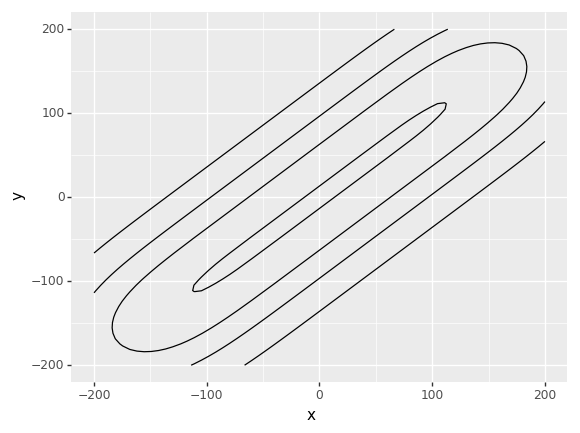

<ggplot: (304962063)>

In [73]:
x = np.linspace(-200, 200, num=100)
y = np.linspace(-200, 200, num=100)

(
    ggplot(
        data=pd.DataFrame({'x': x, 'y': y}),
        mapping=aes(x = 'x', y = 'y')) +
    geom_density_2d()
)

### Defining function $f(x, y)$

$f(x, y)=(x - 10)^2+(y+2)^2$

In [65]:
def f(x: int, y: int):
    return (x - 10)**2 + (y + 2)**2

In [66]:
f_df = pd.DataFrame({
    'x': x,
    'y': y,
    'f(x, y)': f(x, y)
})

f_df.head()

,x,y,"f(x, y)"
0,-200.000000,-200.000000,83304.000000
1,-195.959596,-195.959596,80039.680033
2,-191.919192,-191.919192,76840.659525
3,-187.878788,-187.878788,73706.938476
4,-183.838384,-183.838384,70638.516886


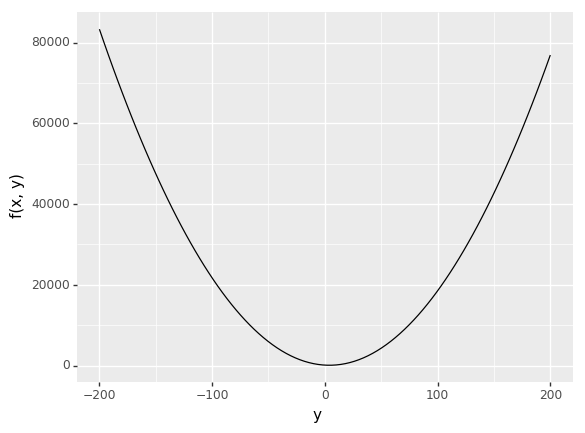

<ggplot: (-9223372036550949481)>

In [67]:
(
    ggplot(data=f_df, mapping=aes(x = 'y', y = 'f(x, y)')) +
    geom_line()
)

### Defining function $g(x, y)$

$g(x, y) = (x − 10)^2 + (x − y + 5)^4$

In [4]:
def g(x: int, y: int):
    return (x - 10)**2 + (x - y + 5)**4

In [28]:
g_df = pd.DataFrame({
    'x': x,
    'y': y,
    'g(x, y)': g(x, y)
})

g_df.head()

,x,y,"g(x, y)"
0,-200.000000,-200.000000,44725.000000
1,-195.959596,-195.959596,43044.355168
2,-191.919192,-191.919192,41396.360065
3,-187.878788,-187.878788,39781.014692
4,-183.838384,-183.838384,38198.319049


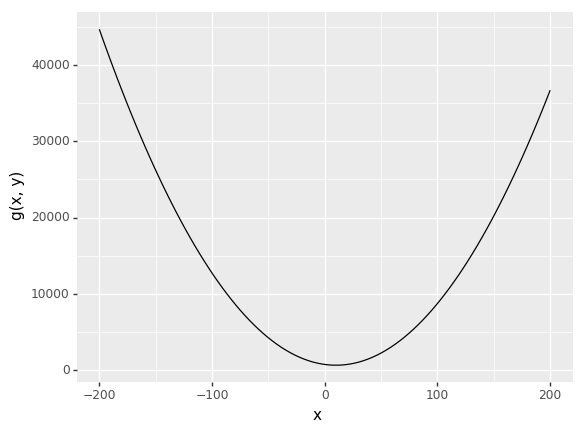

<ggplot: (299268570)>

In [22]:
(
    ggplot(data=g_df, mapping=aes(x = 'x', y = 'g(x, y)')) +
    geom_line()  
)

### Defining The Gradient of $f(x, y)$ and $g(x, y)$

__The partial derivative of function $f(x, y)$ with respect to x (keeping y constant):__

$\frac{\partial f(x, y)}{\partial_x} =(x - 10)^2+(y+2)^2$

$\frac{\partial}{\partial_x} = 2 (x - 10)$

__The partial derivative of function $f(x, y)$ with respect to y (keeping x constant):__

$\frac{\partial f(x, y)}{\partial_y} =(10x)^2+(y+2)^2$

$\frac{\partial}{\partial_y} = 2(y +2)$

__The partial derivative of function $g(x, y)$ with respect to x (keeping y constant):__

$\frac{\partial g(x, y)}{\partial_x} = (x − 10)^2 + (x − y + 5)^4$

$\frac{\partial}{\partial_x} = 2(x - 10) + 4(x - y + 5)^3$

__The partial derivative of function $g(x, y)$ with respect to y (keeping x constant):__

$\frac{\partial g(x, y)}{\partial_y} = (x − 10)^2 + (x − y + 5)^4$

$\frac{\partial}{\partial_y} = -4\left(x+5-y\right)^3$

In [24]:
def gradient_descent(
    x,
    y,
    delta_x,
    delta_y,
    alpha = 0.01,
    max_iters = 100
):
    x_history = np.zeros(max_iters)
    y_history = np.zeros(max_iters)
    
    for i in range(max_iters): 
        
        # Update the values of our x and y
        x = Decimal(x) - Decimal(alpha) * Decimal(delta_x(x = x, y = y))
        y = Decimal(y) - Decimal(alpha) * Decimal(delta_y(x = x, y = y))
        
        # Compute the value of our x and y
        # Keep track of the cost at each iteration
        x_history[i] = x
        y_history[i] = y
        
    return x_history, y_history 

## 2. Starting with (𝑥,𝑦)=(0,0), and set up a fixed learning rate 𝛾=0.5, run the gradient descent algorithm for each function. Run for 10 iterations, and report both (𝑥,𝑦) and the function value at the end of each iteration.

### Gradient Descent for function $f(x, y)$

In [58]:
x_history, y_history = gradient_descent(
    0, 0, 
    delta_x = lambda x, y: 2 * (x - 10),
    delta_y = lambda x, y: 2 * (y + 2),
    alpha = 0.5, 
    max_iters = 10)

result_df = pd.DataFrame({
    'x': x_history,
    'y': y_history,
    'f(x, y)': f(x_history, y_history)
})

result_df

,x,y,"f(x, y)"
0,10.0,-2.0,0.0
1,10.0,-2.0,0.0
2,10.0,-2.0,0.0
3,10.0,-2.0,0.0
4,10.0,-2.0,0.0
5,10.0,-2.0,0.0
6,10.0,-2.0,0.0
7,10.0,-2.0,0.0
8,10.0,-2.0,0.0
9,10.0,-2.0,0.0


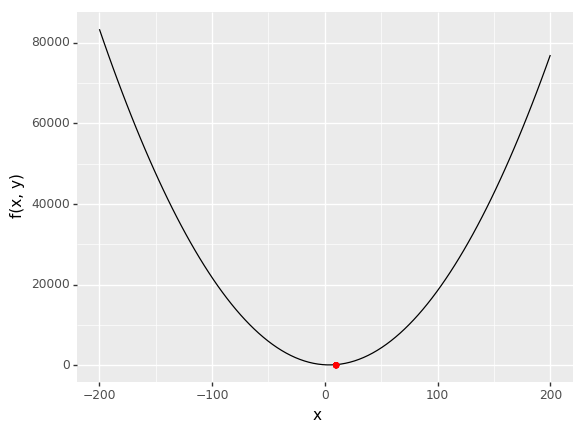

<ggplot: (-9223372036552874068)>

In [59]:
(
    ggplot(data=f_df_scaled, mapping=aes(x = 'x', y = 'f(x, y)')) +
    geom_line() +
    geom_point(
        data = result_df,
        mapping = aes(x = 'x', y = 'y'), color = 'red')
)

### Gradient Descent for function $g(x, y)$

In [25]:
x_history, y_history = gradient_descent(
    0, 0, 
    delta_x = lambda x, y: 2 * (x - 10) + 4 * (x + 5 - y)**3,
    delta_y = lambda x, y: -4 * (x + 5 - y)**3,
    alpha = 0.00005, 
    max_iters = 10)

result_df = pd.DataFrame({
    'x': x_history,
    'y': y_history,
    'g(x, y)': g(x_history, y_history)
})

result_df

,x,y,"g(x, y)"
0,-0.024000,0.024642,701.512320
1,-0.047275,0.048578,679.381657
2,-0.069860,0.071844,658.505807
3,-0.091787,0.094469,638.792004
4,-0.113087,0.116483,620.155897
5,-0.133788,0.137913,602.520645
6,-0.153916,0.158786,585.816135
7,-0.173498,0.179126,569.978280
8,-0.192555,0.198955,554.948414
9,-0.211111,0.218295,540.672747


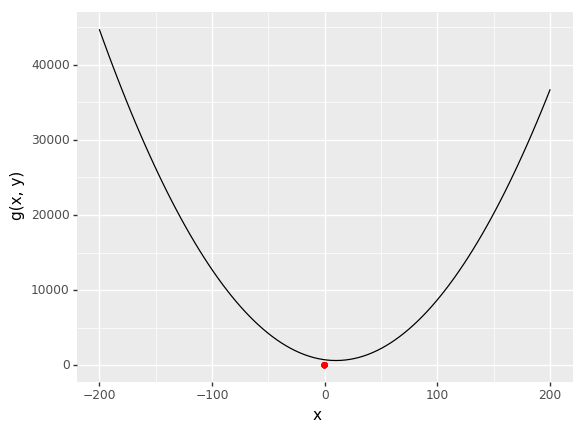

<ggplot: (-9223372036554590548)>

In [35]:
(
    ggplot(data=g_df, mapping=aes(x = 'x', y = 'g(x, y)')) +
    geom_line() +
    geom_point(
        data = result_df,
        mapping = aes(x = 'x', y = 'y'), color = 'red')
)

## 3. Adjust the $\gamma$, and find out the fastest convergence (smallest function value) after T steps (try T = 10 or 100).

### Gradient Descent for function $f(x, y)$

In [71]:
x_history, y_history = gradient_descent(
    0, 0, 
    delta_x = lambda x, y: 2 * (x - 10),
    delta_y = lambda x, y: 2 * (y + 2),
    alpha = 0.5, 
    max_iters = 10)

result_df = pd.DataFrame({
    'x': x_history,
    'y': y_history,
    'f(x, y)': f(x_history, y_history)})

result_df.tail()

,x,y,"f(x, y)"
5,10.0,-2.0,0.0
6,10.0,-2.0,0.0
7,10.0,-2.0,0.0
8,10.0,-2.0,0.0
9,10.0,-2.0,0.0


The $\gamma$ that produces the smallest value for $f(x, y)$ is __0.5__ which produces a value of __0__ for $f(x, y)$ after 10 iterations

### Gradient Descent for function $g(x, y)$

In [164]:
x_history, y_history = gradient_descent(
    0, 0, 
    delta_x = lambda x, y: 2 * (x - 10) + 4 * (x + 5 - y)**3,
    delta_y = lambda x, y: -4 * (x + 5 - y)**3,
    alpha = 0.01, 
    max_iters = 100)

result_df = pd.DataFrame({
    'x': x_history,
    'y': y_history,
    'g(x, y)': g(x_history, y_history)})

result_df.tail()

,x,y,"g(x, y)"
95,4.970893,8.906307,26.576386
96,5.023213,8.962040,26.036484
97,5.074950,9.017176,25.508022
98,5.126110,9.071724,24.990748
99,5.176700,9.125690,24.484414


The $\gamma$ that produces the smallest value for $g(x, y)$ is __0.01__ which produces a value of __24.48__ for $g(x, y)$ after 100 iterations

# Problem 2

Assuming our input training data is : 

* (X1 = 2, Y1 = 8)
* (X2 = 5, Y2 = 25) 
* (X3 = 3, Y3 = 9)
* (X3 = 10, Y3 = 40)

Let us consider that we use the least square to fit the data.

* a. Please write down the overall loss function the least square aims to optimize.

* b. Please write down the gradient for the corresponding loss function at $\theta_0=0$ and $\theta_1=0$.

* c. Please write down the normal equation solution. (No need to solved the problem, but you need provide the matrix based on the problem)

__a. The overall loss function is Mean Squared Error (MSE)__

MSE = $\frac{1}{m}\sum_{i=1}^m (h_{\theta}(x_{i}) - y_{i})^2$

__b. The gradient for the loss function at $\theta_0=0$ and $\theta_1=0$__

Our loss function will be defined as:

$J(\theta) = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x_{i}) - y_{i})^2$

where:
* m is the number of observations
* $h_{\theta}(x)$ is a linear function $h_\theta:X→Y$, where $X$ is the input space (independent variable) and $Y$ is the output space (predicted dependent variable)
* $y_{i}$ is the true $y$

$J(\theta_0,\theta_1) = \frac{1}{4}( ((\theta_{0}+ \theta_{1}2) - 8)^2 + ((\theta_{0}+ \theta_{1}5) - 25)^2 +((\theta_{0}+ \theta_{1}3) - 9)^2 + ((\theta_{0}+ \theta_{1}10) - 40)^2)$


$= \frac{1}{4}(4\theta_0^2 + 40\theta_0\theta_1-164\theta_0+138\theta_1^2+2370-1136\theta_1)$

__Partial derivates of $J(\theta_0,\theta_1)$__

$\frac{\partial_J(\theta_0,\theta_1)}{\partial\theta_0} = \frac{1}{4}(4\theta_0^2 + 40\theta_0\theta_1-164\theta_0+138\theta_1^2+2370-1136\theta_1)$

$=2\theta_0+10\theta_1-41$

$\frac{\partial_J(\theta_0,\theta_1)}{\partial\theta_1} = \frac{1}{4}(4\theta_0^2 + 40\theta_0\theta_1-164\theta_0+138\theta_1^2+2370-1136\theta_1)$

$=10\theta_0+69\theta_1-284$

__Setting $\theta_0=0$ and $\theta_1=0$__

$\frac{\partial_J(\theta_0,\theta_1)}{\partial\theta_0}= 2\theta_0+10\theta_1-41 = -41$

$\frac{\partial_J(\theta_0,\theta_1)}{\partial\theta_1} = 2\theta_0+10\theta_1-41= -284$

The gradient for the loss function at $\theta_0=0$ and $\theta_1=0$ is __-41__ and __-284__

__c. The normal equation solution is:__

$b = (X^TX)^{-1}X^T Y$

where:
* where $b = b_0, b_1,\dots b_n$

the matrix representation would be:

$b = \begin{pmatrix}
\begin{bmatrix}1 & 2 \\ 1 & 5 \\ 1 & 3 \\ 1 & 10 \end{bmatrix}^T
\times
\begin{bmatrix}1 & 2 \\ 1 & 5 \\ 1 & 3 \\ 1 & 10 \end{bmatrix}
\end{pmatrix}^{-1}$
$\times$
$\begin{bmatrix}1 & 2 \\ 1 & 5 \\ 1 & 3 \\ 1 & 10 \end{bmatrix}^T$
$\times$
$\begin{bmatrix} 8 \\ 25 \\ 9 \\ 40 \end{bmatrix}$

# Question 3

Consider
$
A = \begin{bmatrix}2 & 1 \\ 1 & 2 \end{bmatrix}
$
* a. Please compute its eigenvalues and eigenvectors.
* b. Please factor them into the form of $X$$\wedge$$X^{−1}$

__a. Please compute its eigenvalues and eigenvectors.__

form a new matrix by subtracting $\lambda$ from the diagonal entries of the given matrix, $A$:

$
A = \begin{bmatrix}-\lambda + 2 & 1 \\ 1 & -\lambda + 2 \end{bmatrix}
$

Find the determinant of the obtained matrix:

$A = \begin{bmatrix}-\lambda + 2 & 1 \\ 1 & -\lambda + 2 \end{bmatrix}$

$\quad= (-\lambda + 2)^2 - 1$

Finally we solve the equation $(-\lambda + 2)^2 - 1 = 0$ to find the eigenvalues. 

__The eigenvalues are:__

$\lambda_1 = 1 \\ \lambda_2 = 3$

Now to find the eigenvectors:

__i. Find the eigenvector for $\lambda = 1$__

$\begin{bmatrix}-\lambda + 2 & 1 \\ 1 & -\lambda + 2 \end{bmatrix}=
\begin{bmatrix}-1 + 2 & 1 \\ 1 & -1 + 2 \end{bmatrix}=
\begin{bmatrix}1 & 1 \\ 1 & 1 \end{bmatrix}$

We then perform row operations to obtain the Reduced Row Echelon Form of the matrix:

$\begin{bmatrix}1 & 1 \\ 1 & 1 \end{bmatrix}
\sim
\begin{bmatrix}1 & 1 \\ 0 & 0 \end{bmatrix}$

The now solve the matrix equation

$\begin{bmatrix}1 & 1 \\ 0 & 0 \end{bmatrix}
\times
\begin{bmatrix} v_1 \\ v_2 \end{bmatrix} =
\begin{bmatrix} 0 \\ 0 \end{bmatrix}$

if we take $v_2 = t$, then $v_1 = -t$

Therefore $v = \begin{bmatrix} -t \\ t \end{bmatrix} = \begin{bmatrix} -1 \\ 1 \end{bmatrix}t$

__ii. Find the eigenvector for $\lambda = 3$__

$\begin{bmatrix}-\lambda + 2 & 1 \\ 1 & -\lambda + 2 \end{bmatrix}=
\begin{bmatrix}-3 + 2 & 1 \\ 1 & -3 + 2 \end{bmatrix} =
\begin{bmatrix}-1 & 1 \\ 1 & -1 \end{bmatrix}$

We then perform row operations to obtain the Reduced Row Echelon Form of the matrix:

$\begin{bmatrix} -1 & 1 \\ 1 & -1 \end{bmatrix}
\sim
\begin{bmatrix} 1 & -1 \\ 0 & 0 \end{bmatrix}$

The now solve the matrix equation

$\begin{bmatrix}1 & -1 \\ 0 & 0 \end{bmatrix}
\times
\begin{bmatrix} v_1 \\ v_2 \end{bmatrix} =
\begin{bmatrix} 0 \\ 0 \end{bmatrix}$

if we take $v_2 = t$, then $v_1 = t$

Therefore $v = \begin{bmatrix} t \\ t \end{bmatrix} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}t$

The eiganvectors are:

$\begin{bmatrix} -1 \\ 1 \end{bmatrix} and \begin{bmatrix} 1 \\ 1 \end{bmatrix}$

__b. Please factor them into the form of $X$$\wedge$$X^{−1}$__

$\begin{bmatrix}2 & 1 \\ 1 & 2 \end{bmatrix}=
\begin{bmatrix}-1 & 1 \\ 1 & 1 \end{bmatrix}
\begin{bmatrix}1 & 0 \\ 0 & 3 \end{bmatrix}
\begin{bmatrix}-1 & 1 \\ 1 & 1 \end{bmatrix}^{-1}$

$\quad\quad\quad=
\begin{bmatrix}-1 & 1 \\ 1 & 1 \end{bmatrix}
\begin{bmatrix}1 & 0 \\ 0 & 3 \end{bmatrix}
\begin{bmatrix}-1 & 1 \\ 1 & 1 \end{bmatrix}^{-1}$

We have to make the matrix $X$ orthonormal by dividing each element in the matrix by its length which will be $\sqrt{2}$ and then evaluate the matrix $X^{-1}$ to obtain the final form

$= \begin{bmatrix}\frac{-1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \end{bmatrix}
\begin{bmatrix}1 & 0 \\ 0 & 3 \end{bmatrix}
\begin{bmatrix}\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}} \end{bmatrix}$

# Question 4

The matrix

$A = \begin{bmatrix} 0.96 & 1.72 \\ 2.28 & 0.96 \end{bmatrix}$

has the SVD

$
A = U \Sigma V^{−1} =
\begin{bmatrix} 0.6 & -0.8 \\ 0.8 & 0.6 \end{bmatrix}
\begin{bmatrix} 3 & 0 \\ 0 & 1 \end{bmatrix}
\begin{bmatrix} 0.8 & 0.6 \\ 0.6 & -0.8 \end{bmatrix}^{-1}$

Please verify matrices $U$ and $V$ are orthogonal matrices; and list the singular values of $A$.

For matrices $U$ and $V$ to be orthogonal the must satify this rule:
$A \times A^T = I$, meaning multiply $A$ with its transpose must give you an identity matrix.

__1. Testing matrix $U$ for orthogonality__

$
\begin{bmatrix} 0.6 & -0.8 \\ 0.8 & 0.6 \end{bmatrix}
\times
\begin{bmatrix} 0.6 & -0.8 \\ 0.8 & 0.6 \end{bmatrix}^T
$

=
$
\begin{bmatrix} 0.6 & -0.8 \\ 0.8 & 0.6 \end{bmatrix}
\times
\begin{bmatrix} 0.6 & 0.8 \\ -0.8 & 0.6 \end{bmatrix}
$

=
$
\begin{bmatrix} 1 & 0 \\  0 & 1 \end{bmatrix}
$

As you can see the matrix $U$ satisfies the rule.

__1. Testing matrix $V$ for orthogonality__

$
\begin{bmatrix} 0.8 & 0.6 \\ 0.6 & -0.8 \end{bmatrix}
\times
\begin{bmatrix} 0.8 & 0.6 \\ 0.6 & -0.8 \end{bmatrix}^T
$

=
$
\begin{bmatrix} 0.8 & 0.6 \\ 0.6 & -0.8 \end{bmatrix}
\times
\begin{bmatrix} 0.8 & 0.6 \\ 0.6 & -0.8 \end{bmatrix}
$

=
$
\begin{bmatrix} 1 & 0 \\  0 & 1 \end{bmatrix}
$

The matrix $V$ also satifies the rule.

The singular values of the original matrix $A$ are $3, 1$

# Problem 5

Assuming our input training data is : 

* (X1 = 2, Y1 = 0)
* (X2 = 5, Y2 = 1) 
* (X3 = 3, Y3 = 3)
* (X3 = 10, Y3 = 1)

Let us consider that we use the least square to fit the data.

* a. Please write down the overall loss function the logistic regression.

* b. Please write down the gradient for the corresponding loss function at (x = 0).

__a. The overall loss function for logistic regression is Cross Entropy or log loss__

![cross_entropy.png](https://ml-cheatsheet.readthedocs.io/en/latest/_images/ng_cost_function_logistic.png)

__b. The gradient for the loss function at $\theta_0=0$ and $\theta_1=0$__

Our loss function will be defined as:

$J(\theta) = - \frac{1}{m} \sum_{i=1}^m (ylog(h) + (1 - y)log(1 - h))$

where

* $h = \sigma(\theta^{T}x)$

$h = \sigma(\theta^{T}x)$, where $\sigma(z) = \frac{e^z}{1 +e^z} = \frac{1}{1+e^{−z}}$

Thus,

$h = \frac{e^{θ^{T}x}}{1 +e^{θ^{T}x}} = \frac{1}{1+e^{−{θ^{T}x}}}$

The partial derivative of our loss function, $J(\theta)$, gives us the gradient in a general form. 

$\frac{\partial_J(\theta)}{\partial\theta_j} = \frac{1}{m} \sum_{i=1}^m x_i(\sigma(\theta_j x) - y_i)$

So we will use the already computed partial derivative of $J(\theta)$ with respect to $\theta_0$ and $\theta_1$ in order to make the computation easier before setting $\theta_0=0$ and $\theta_1=0$ 

$\frac{\partial_J(\theta_0,\theta_1)}{\partial\theta_0} = \frac{1}{4} ((\sigma(\theta_0*1) - 0) + (\sigma(\theta_0*1) - 1) + (\sigma(\theta_0*1) - 3) + (\sigma(\theta_0*1) - 1))$

$\frac{\partial_J(\theta_0,\theta_1)}{\partial\theta_1} = \frac{1}{4} ((\sigma(\theta_1*2) - 0) + (\sigma(\theta_1*5) - 1) + (\sigma(\theta_1*3) - 3) + (\sigma(\theta_1*10) - 1))$

__Setting $\theta_0=0$ and $\theta_1=0$__

$\frac{\partial_J(\theta_0,\theta_1)}{\partial\theta_0} = \frac{1}{4} ( 1* (\sigma(0) - 0) + 1* (\sigma(0) - 1) + 1* (\sigma(0) - 3) + 1* (\sigma(0) - 1)) = -0.75$

$\frac{\partial_J(\theta_0,\theta_1)}{\partial\theta_1} = \frac{1}{4} (2 * (\sigma(0) - 0) + 5* (\sigma(0) - 1) + 3 *(\sigma(0) - 3) + 10* (\sigma(0) - 1) = -3.5$

The gradient for the loss function at $\theta_0=0$ and $\theta_1=0$ is __-0.75__ and __-3.5__

# Problem 6

Let us consider the sigmoid function:

$\sigma(z) = \frac{e^z}{1 +e^z} = \frac{1}{1+e^{−z}}$

Please list possible functions based on the sigmoid function, i.e.,
$f(x) = \sigma(Tx)$, where T is a linear transformation (map) of x, to implement the boolean functions, AND, OR and NOT, respectively. For instance, when: 

x1 = 1, x2 = 1 => $x_1$ AND $x_2$ = 1

and

x1 = 1, x2 = 0 => $x_1$ AND $x_2$ = 0.

__AND__

$f(x) = \sigma(1 * x_1 + 1 * x_2 + -1.5 )$

$z = 1 * x_1 + 1 * x_2 + -1.5$

| $x_1$ | $x_2$ | $z$ | $\sigma$ |
| --- | --- | --- | --- |
| 0 | 0 | -1.5 | 0 |
| 0 | 1 | -0.5 | 0 |
| 1 | 0 | -0.5 | 0 |
| 1 | 1 | 0.5 | 1 |

__OR__

$f(x) = \sigma(1 * x_1 + 1 * x_2 + -1 )$

$z = 1 * x_1 + 1 * x_2 + -1$

| $x_1$ | $x_2$ | $z$ | $\sigma$ |
| --- | --- | --- | --- |
| 0 | 0 | -1 | 0 |
| 0 | 1 | 0 | 1 |
| 1 | 0 | 0 | 1 |
| 1 | 1 | 1 | 1 |

__NOT__

$f(x) = \sigma(-1 * x_1 + 0.5 )$

$z = -1 * x_1 + 0.5$

| $x_1$ | $z$ | $\sigma$ |
| --- | --- | --- |
| 0 | 0.5 | 1 |
| 1 | -0.5 | 0 |

# Problem 7

Please use the three neurons in problem 6 to represent boolean function: x XOR y XOR z (Hint: X XOR Y=NOT((X AND Y) OR (NOT X AND NOT Y))).

Use the three types of neural network format (network representation, function representation, computational graph representation) to represent it.

__Network Representation__

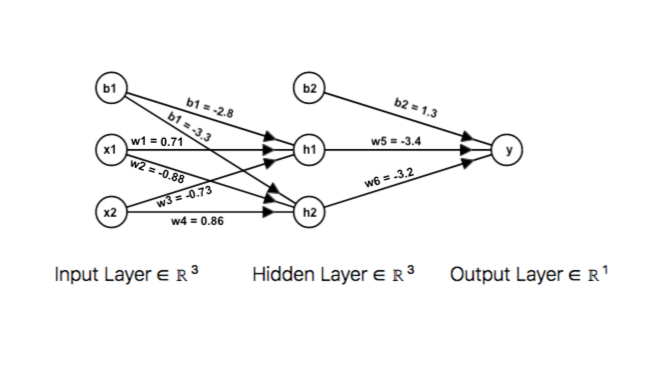

__Function Representation__

$h_1(x) = \sigma(0.71 * x_1 + -0.73 * x_2 + -2.8)$ (NOT $x_1$ AND $x_2$)

$h_2(x) = \sigma(-0.88 * x_1 + 0.86 * x_2 + -3.3)$ (NOT $x_2$ AND $x_1$)

$y(x) = \sigma(-0.34 * h_1 + -0.32 * h_2 + 1.3)$ (OR)


__Computational Graph Representation__

To view in Tensorflow Playground [Click Here](https://playground.tensorflow.org/#activation=sigmoid&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2,1&seed=0.00814&showTestData=false&discretize=false&percTrainData=90&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&batchSize_hide=false)

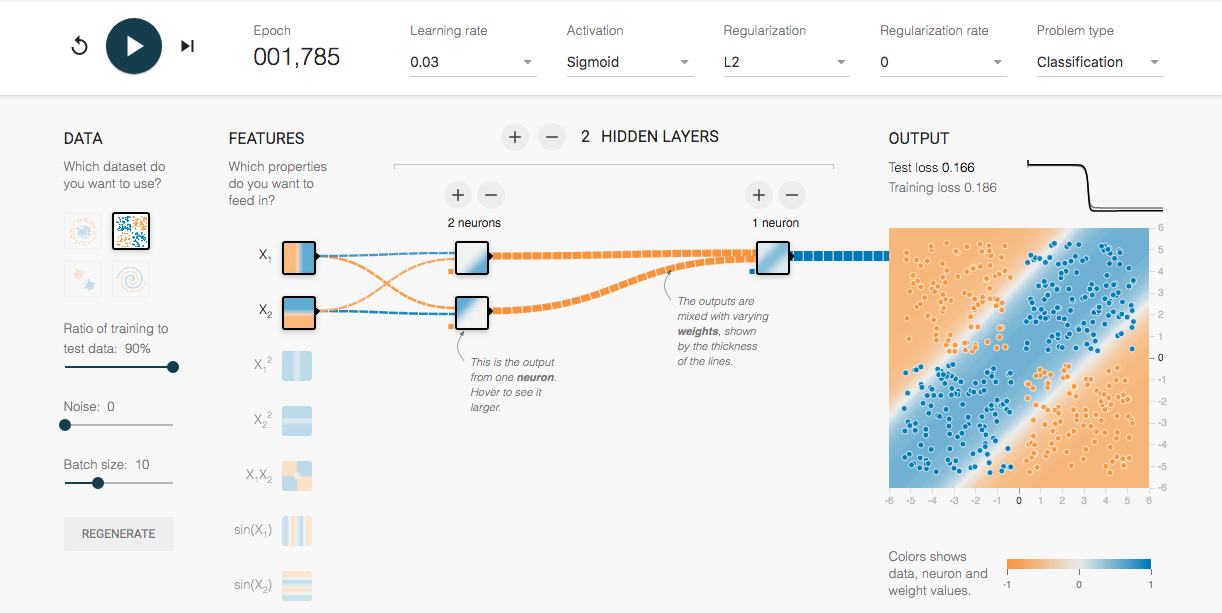